## Explainability Global Metrics for Binary Classification and Regression

#### Imports

In [68]:
import numpy as np

def smape(y_true, y_pred):
    return (
        1.0 / len(y_true) * np.sum(np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))
    )

y_true = np.random.randint(0, 1000, 5)
y_pred = np.random.randint(0, 1000, 5)

print(smape(y_true, y_pred))

0.3085364431819899


In [1]:
import sys
sys.path.append("../../")

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler

from holisticai.datasets import load_adult

# data and simple preprocessing
dataset = load_adult()['frame']
dataset = dataset.iloc[0:1000,]
X = pd.get_dummies(dataset.drop(columns=['class', 'fnlwgt']), drop_first=True)
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
X_standard = pd.DataFrame(X_standard, columns=X.columns)

y_clf = pd.DataFrame(dataset['class'].apply(lambda x: 1 if x == '>50K' else 0))
y_reg = pd.DataFrame(dataset['fnlwgt'])
y_reg = scaler.fit_transform(y_reg)

# regression
reg = LinearRegression()
reg.fit(X_standard, y_reg)

# classification
clf = LogisticRegression(random_state=42, max_iter=100)
clf.fit(X_standard, y_clf)

# import Explainer
from holisticai.explainability import Explainer

### Global Metrics

In [2]:
# instantiate explainer permutation
explainer = Explainer(based_on='feature_importance', 
                      strategy_type='permutation', 
                      model_type='binary_classification', 
                      model=clf, 
                      x=X_standard,
                      y=y_clf)

In [3]:
explainer.metrics()

,Value,Reference
Fourth Fifths,0.229167,0
Importance Spread Divergence,1.113834,-
Importance Spread Ratio,0.755971,0
Global Overlap Score [label=0],0.050324,1
Global Overlap Score [label=1],0.002197,1
Global Range Overlap Score [label=0],0.741399,1
Global Range Overlap Score [label=1],0.728108,1
Global Explainability Score,1.000000,1


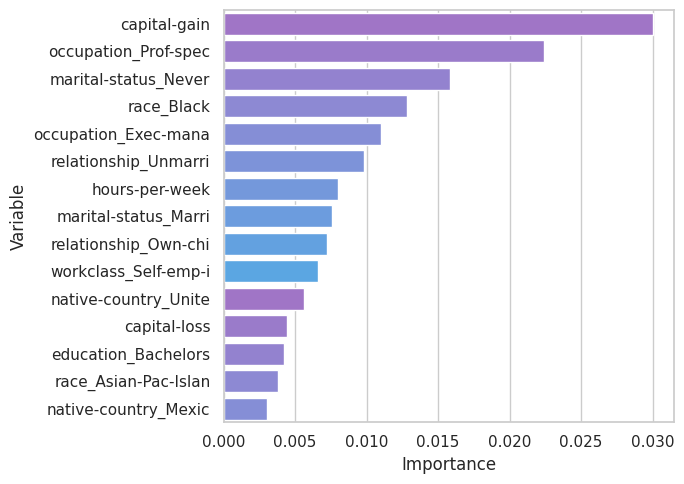

In [4]:
explainer.bar_plot(max_display=15)

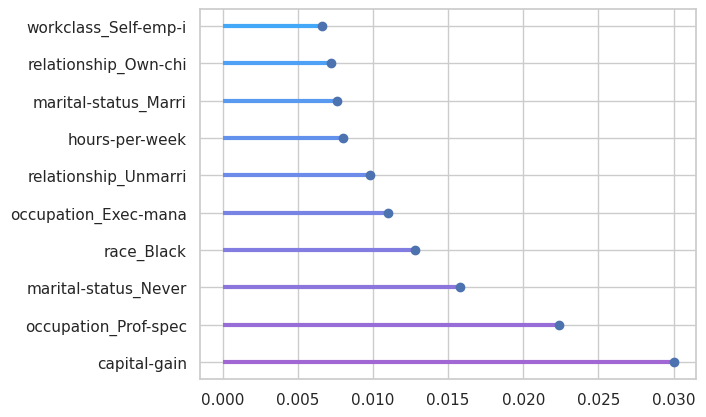

In [5]:
explainer.lolipop_plot(max_display=10)

In [6]:
# instantiate explainer permutation
explainer = Explainer(based_on='feature_importance', 
                      strategy_type='permutation', 
                      model_type='regression', 
                      model=reg, 
                      x=X_standard, 
                      y=y_reg)

In [7]:
explainer.metrics()

,Value,Reference
Fourth Fifths,0.041667,0
Importance Spread Divergence,2.579524,-
Importance Spread Ratio,0.434854,0
Global Overlap Score [Q0-Q1],0.270573,1
Global Overlap Score [Q1-Q2],0.324374,1
Global Overlap Score [Q2-Q3],0.280349,1
Global Overlap Score [Q3-Q4],0.216422,1
Global Range Overlap Score [Q0-Q1],0.894476,1
Global Range Overlap Score [Q1-Q2],0.899688,1
Global Range Overlap Score [Q2-Q3],0.868071,1


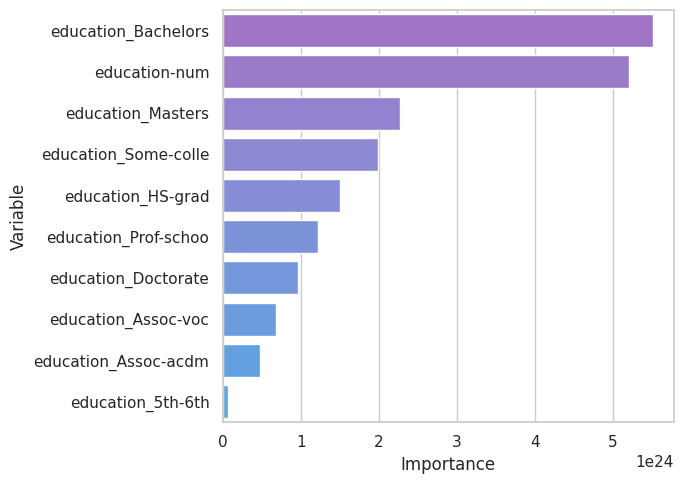

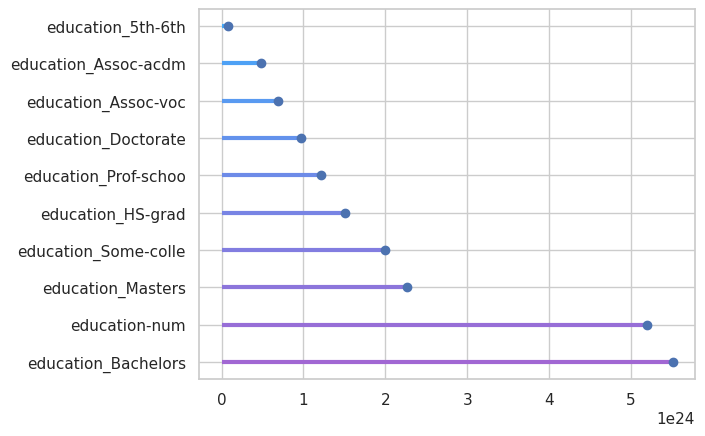

In [8]:
explainer.bar_plot(max_display=10)
explainer.lolipop_plot(max_display=10)

In [9]:
# instantiate explainer surrogate classification
explainer = Explainer(based_on='feature_importance', 
                      strategy_type='surrogate', 
                      model_type='binary_classification',
                      model=clf, 
                      x=X_standard, 
                      y=y_clf)

In [10]:
explainer.metrics()

,Value,Reference
Fourth Fifths,0.020833,0
Importance Spread Divergence,3.318287,-
Importance Spread Ratio,0.272999,0
Global Explainability Score,1.000000,1
Surrogate Efficacy Classification,0.822000,1


[Text(0.5, 0.875, 'marital-status_Married-civ-spouse <= 0.02\ngini = 0.318\nsamples = 1000\nvalue = [802, 198]'),
 Text(0.25, 0.625, 'capital-gain <= 0.674\ngini = 0.042\nsamples = 510\nvalue = [499, 11]'),
 Text(0.125, 0.375, 'education-num <= 1.707\ngini = 0.012\nsamples = 500\nvalue = [497, 3]'),
 Text(0.0625, 0.125, 'gini = 0.004\nsamples = 493\nvalue = [492, 1]'),
 Text(0.1875, 0.125, 'gini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.375, 0.375, 'occupation_Other-service <= 1.306\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.625, 'education-num <= 0.563\ngini = 0.472\nsamples = 490\nvalue = [303, 187]'),
 Text(0.625, 0.375, 'capital-gain <= 0.176\ngini = 0.324\nsamples = 340\nvalue = [271, 69]'),
 Text(0.5625, 0.125, 'gini = 0.231\nsamples = 308\nvalue = [267, 41]'),
 Text(0.6875, 0.125, 'gini = 0.219\nsamples = 32\nvalue = [4, 28]'),


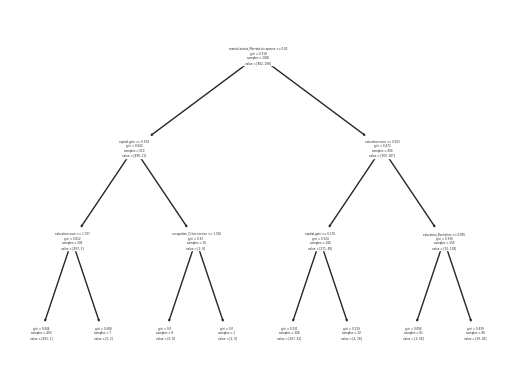

In [11]:
explainer.visualization('Decision Tree sklearn')

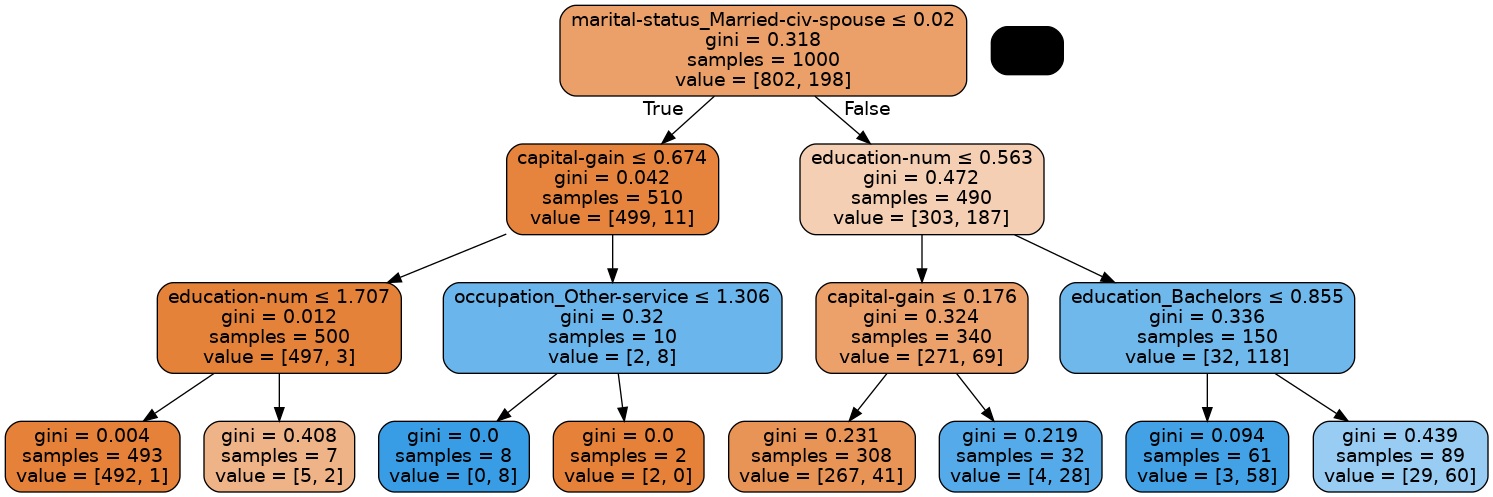

In [12]:
explainer.visualization('Decision Tree graphviz')

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

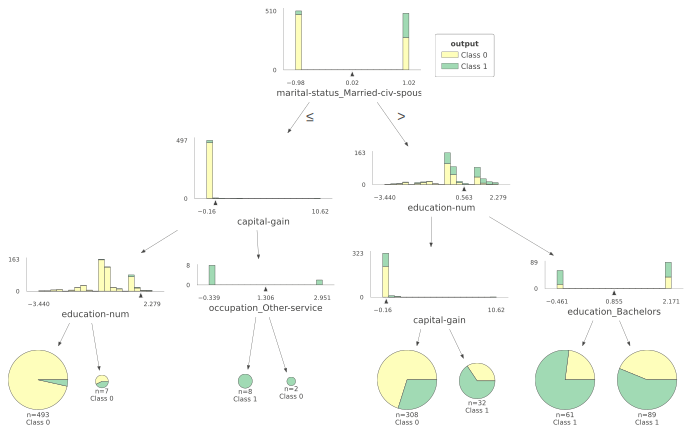

In [13]:
explainer.visualization('Decision Tree dtreeviz')

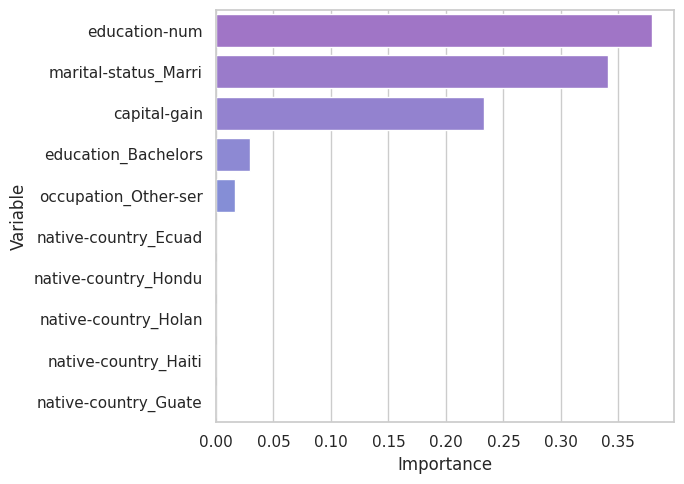

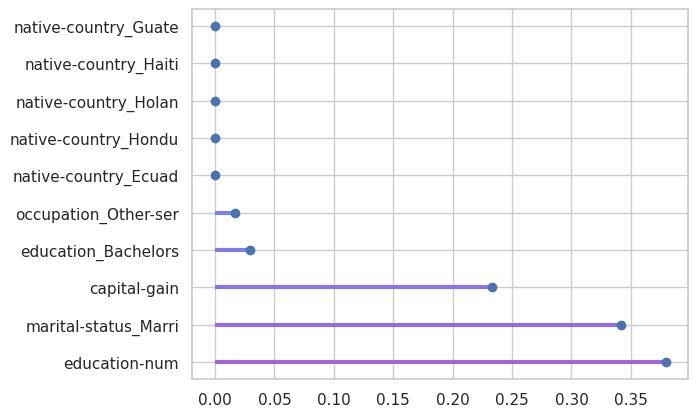

In [14]:
explainer.bar_plot(max_display=10)
explainer.lolipop_plot(max_display=10)

In [20]:
# instantiate explainer surrogate regression
explainer = Explainer(based_on='feature_importance', 
                      strategy_type='surrogate', 
                      model_type='regression', 
                      model=reg, 
                      x=X_standard, 
                      y=y_reg)

In [21]:
explainer.metrics()

,Value,Reference
Fourth Fifths,0.020833,0
Importance Spread Divergence,3.210465,-
Importance Spread Ratio,0.296621,0
Global Explainability Score,1.000000,1
Surrogate Efficacy Regression,1.690442,0


[Text(0.5416666666666666, 0.875, 'race_Black <= 1.271\nsquared_error = 0.106\nsamples = 1000\nvalue = -0.0'),
 Text(0.3333333333333333, 0.625, 'age <= 0.687\nsquared_error = 0.084\nsamples = 893\nvalue = -0.052'),
 Text(0.16666666666666666, 0.375, 'native-country_Mexico <= 3.341\nsquared_error = 0.075\nsamples = 675\nvalue = 0.005'),
 Text(0.08333333333333333, 0.125, 'squared_error = 0.067\nsamples = 656\nvalue = -0.011'),
 Text(0.25, 0.125, 'squared_error = 0.041\nsamples = 19\nvalue = 0.577'),
 Text(0.5, 0.375, 'race_White <= -0.986\nsquared_error = 0.071\nsamples = 218\nvalue = -0.228'),
 Text(0.4166666666666667, 0.125, 'squared_error = 0.064\nsamples = 11\nvalue = -0.68'),
 Text(0.5833333333333334, 0.125, 'squared_error = 0.059\nsamples = 207\nvalue = -0.204'),
 Text(0.75, 0.625, 'education-num <= -2.678\nsquared_error = 0.083\nsamples = 107\nvalue = 0.43'),
 Text(0.6666666666666666, 0.375, 'squared_error = 0.0\nsamples = 1\nvalue = -0.912'),
 Text(0.8333333333333334, 0.375, 'marit

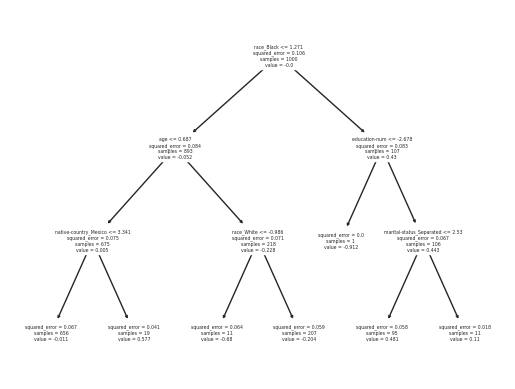

In [23]:
explainer.visualization('Decision Tree sklearn')

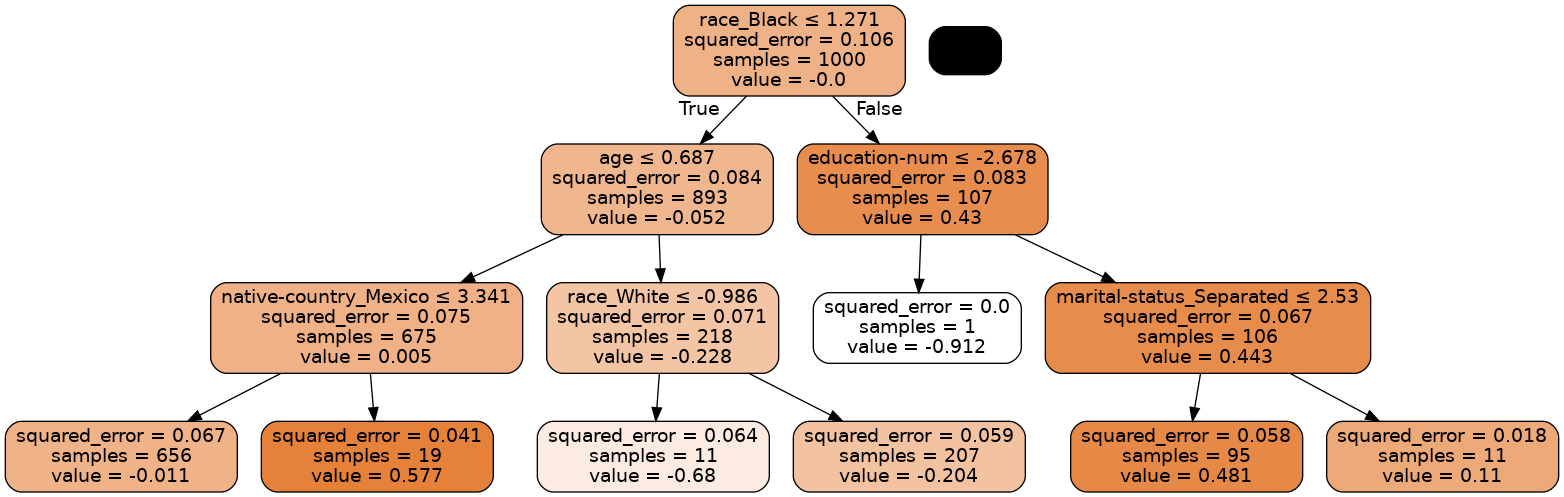

In [24]:
explainer.visualization('Decision Tree graphviz')

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

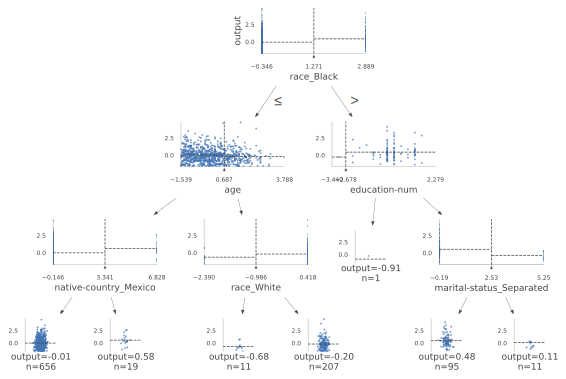

In [26]:
explainer.visualization('Decision Tree dtreeviz')

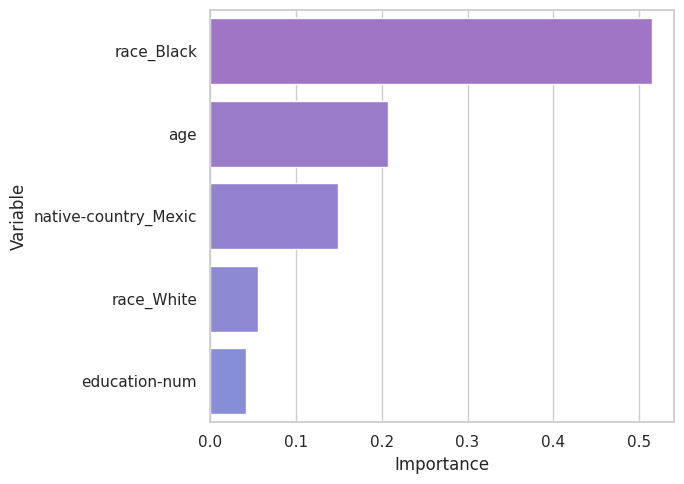

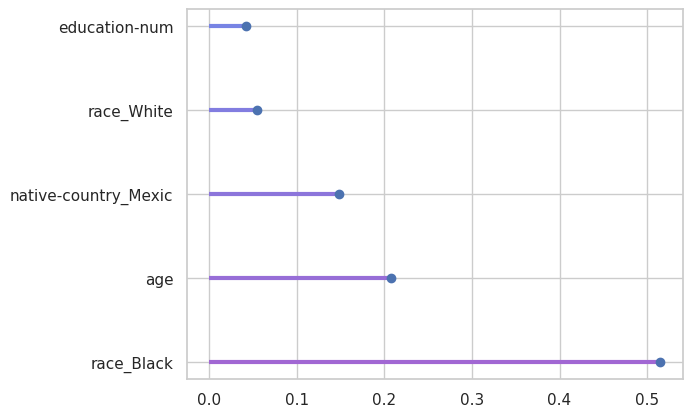

In [19]:
explainer.bar_plot(max_display=5)
explainer.lolipop_plot(max_display=5)